In [7]:
from google.colab import files
uploaded = files.upload()


Saving labeledTrainData.tsv to labeledTrainData.tsv


In [19]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
import os 
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from bs4 import BeautifulSoup

In [8]:
train = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
test = pd.read_csv('testData.tsv', delimiter='\t')

In [9]:
train.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [10]:
test.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [11]:
train.groupby('sentiment').describe().transpose()

sentiment                                                      0                                                  1
id     count                                               12500                                              12500
       unique                                              12500                                              12500
       top                                                1846_3                                            2539_10
       freq                                                    1                                                  1
review count                                               12500                                              12500
       unique                                              12432                                              12472
       top     This show comes up with interesting locations ...  The scenes are fast-paced. the characters are ...
       freq                                                    3                                                  2

In [12]:
train['length'] = train['review'].apply(len)

In [13]:
train.head()

,id,sentiment,review,length
0,5814_8,1,With all this stuff going down at the moment w...,2302
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449
3,3630_4,0,It must be assumed that those who praised this...,2245
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231


In [14]:
train.length.describe()

count    25000.000000
mean      1327.710560
std       1005.239246
min         52.000000
25%        703.000000
50%        981.000000
75%       1617.000000
max      13708.000000
Name: length, dtype: float64

In [26]:
def clean_text(text):
  text = text.lower()
  text = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});','',text) 
  text = re.sub(r"can't","cannot",text) #replacing the short forms
  text = re.sub(r"shan't","shall not",text)
  text = re.sub(r"won't","will not",text)
  text = re.sub(r"n't"," not",text) 
  text = re.sub(r"i'm","i am",text)
  text = re.sub(r"what's","what is",text)
  text = re.sub(r"let's","let us",text)
  text = re.sub(r"'re"," are",text)
  text = re.sub(r"'s"," ",text) 
  text = re.sub(r"'ve"," have",text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"\'scuse", " excuse ", text)
  text = re.sub(r"[^a-zA-Z]"," ",text)
  text = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", text) # Removing digits
  text = re.sub('\W', ' ', text)  
  text = re.sub('\s+', ' ', text) 
  text = text.strip(' ') 
  return text

In [27]:
#appending the cleaned text  
train['review'] = train['review'].apply(lambda text: clean_text(text))
test['review'] = train['review'].apply(lambda text: clean_text(text))

(-0.5, 999.5, 499.5, -0.5)

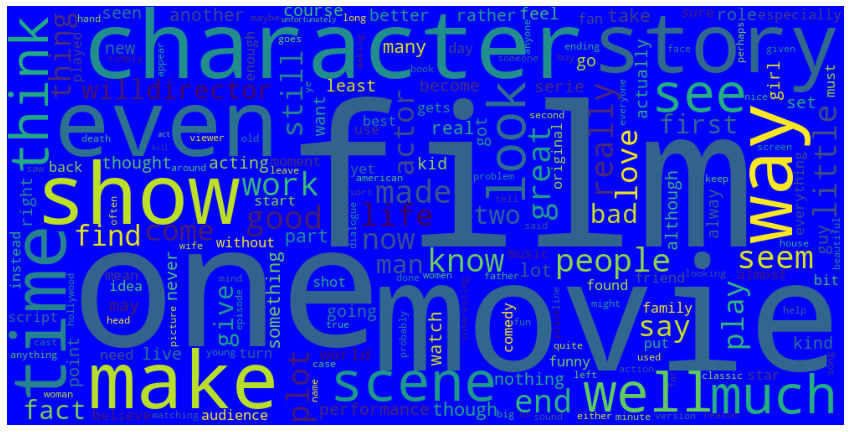

In [28]:
word_cloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'blue').generate(
                        ''.join(train['review']))

plt.figure(figsize = (15,8))
plt.imshow(word_cloud)
plt.axis('off')

In [33]:
#tokenizing and vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

In [31]:
bag = CountVectorizer(analyzer=clean_text).fit(train['review'])

In [ ]:
review_bag = bag.transform(train['review'])

In [34]:
bag1 = bag.transform([r1])

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(bag1)
tfidf1 = tfidf_transformer.transform(bag1)
print(tfidf1)

  (0, 26)	0.003960807633981803
  (0, 25)	0.07129453741167247
  (0, 23)	0.06733372977769066
  (0, 22)	0.06337292214370885
  (0, 21)	0.039608076339818034
  (0, 20)	0.31686461071854427
  (0, 19)	0.20200118933307198
  (0, 18)	0.16635392062723575
  (0, 16)	0.03564726870583623
  (0, 15)	0.2455700733068718
  (0, 14)	0.16239311299325393
  (0, 13)	0.07129453741167247
  (0, 12)	0.1227850366534359
  (0, 11)	0.02376484580389082
  (0, 10)	0.003960807633981803
  (0, 9)	0.24953088094085363
  (0, 8)	0.18219715116316296
  (0, 7)	0.06733372977769066
  (0, 6)	0.06733372977769066
  (0, 5)	0.38815914813021674
  (0, 4)	0.07129453741167247
  (0, 3)	0.11090261375149049
  (0, 2)	0.051490499241763445
  (0, 1)	0.17427553589519934
  (0, 0)	0.6337292214370885


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
tf = TfidfVectorizer(stop_words='english',max_features=15000)
tf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=15000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [42]:
X = train['review']
y = train['sentiment']
X_test = test['review']

In [43]:
X = tf.fit_transform(X)         #training
X_test = tf.transform(X_test)   #testing

In [44]:
print(X.toarray().shape)
X.toarray()

(25000, 15000)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1,random_state=100)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [47]:
rf_clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
y_val_pred = rf_clf.predict(X_val)

In [49]:
print(accuracy_score(y_val_pred,y_val))

0.8492


In [50]:
y_pred = rf_clf.predict(X_test)

In [51]:
submission_file = pd.read_csv('sampleSubmission.csv')
submission_file['sentiment'] = y_pred
submission_file.to_csv('randomforest.csv',index=False)

In [52]:
from google.colab import files
files.download("randomforest.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>